In [2]:
#import libraries

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
# read and transform data
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [16]:
inputData, y = mnist['data'], mnist['target']

inputData = inputData/255
nDigits = 10

yOneHot = np.zeros([y.shape[0],nDigits])
for i in range(y.shape[0]):
    yOneHot[i, int(y[i])] = 1
  
y = yOneHot

In [17]:
m = 60000
m_test = inputData.shape[0] - m

y_train, y_test = y[:m, :].reshape(m, nDigits), y[:m_test, :].reshape(m_test, nDigits)
InputData_train, InputData_test = inputData[:m, :],inputData[:m_test, :]

np.random.seed(1002)

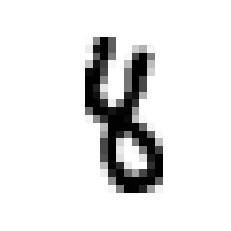

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [18]:
#show a random input
i = 7000
plt.imshow(inputData[i,:].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()
print(y_train[i, :])

In [21]:
# Define Activation, Loss and their Derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu(x):
    return np.maximum(0, x)   #Relu is very simple

def relu_derivative(x):
    return 0.5 * (np.sign(x) + 1)   #Relu derivative is either 0 or 1

def CrossEntropyLoss(y, y_hat):
    L_sum =  np.sum(np.multiply(y, np.log(y_hat)))
    m= y.shape[1]
    L = -(1/m) * L_sum
    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis = 0)

def CE_softmax_derivative(output,ideal_output):
    return output - ideal_output

In [22]:
InputDim = InputData_train.shape[1]
nHidden = 64
learning_rate = 1
weight_decay = 0.001

W1 = 0.01 * np.random.randn(nHidden, InputDim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01 * np.random.randn(nDigits,nHidden)
b2 = np.zeros((nDigits, 1))

inputData = InputData_train
y = y_train

Epoch  0  cost :  0.3068174534192514
Epoch  10  cost :  0.27713950038406693
Epoch  20  cost :  0.2656384107816498
Epoch  30  cost :  0.26470466099758705
Epoch  40  cost :  0.3905883254292371
Epoch  50  cost :  0.24847818321206383
Epoch  60  cost :  0.23738365553086513
Epoch  70  cost :  0.2303224077272857
Epoch  80  cost :  0.22621146964403496
Epoch  90  cost :  0.22376303177915388


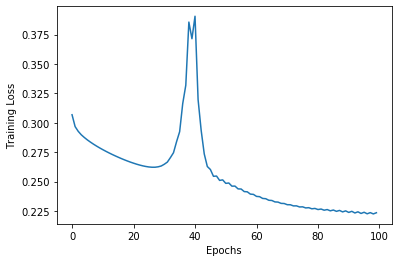

In [27]:
nEpochs = 100
costplot = np.zeros(nEpochs)

for i in range(nEpochs):
    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1)
    A2 = softmax(Z2)
    
    cost = CrossEntropyLoss(y.T, A2)
    costplot[i] = cost
    
    dZ2 = CE_softmax_derivative(A2, y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    
    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if(i % 10 == 0):
        print("Epoch ",i," cost : ",cost)
        
    
plt.plot(costplot)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()

In [28]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2,A1) + b2

predictions = np.argmax(Z2, axis = 0)
labels = np.argmax(y_test.T, axis = 0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions,labels))

[[ 980    0    9    2    1    5    6    4    7   10]
 [   0 1101   13   11    7    5    2    7   13    3]
 [   2    5  895   16    2    3    3    8    7    2]
 [   0    0    6  890    0    6    0    2    5    7]
 [   2    1   17    2  949    2    8   16    7   36]
 [   5    7    3   49    0  822   16    0   10    5]
 [   3    0    4    4    4    7  972    0   13    0]
 [   1    1   10   16    1    0    0 1011    2   15]
 [   8   10   31   29    2    9    7    4  880   12]
 [   0    2    3   13   14    4    0   18    0  888]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1024
           1       0.98      0.95      0.96      1162
           2       0.90      0.95      0.93       943
           3       0.86      0.97      0.91       916
           4       0.97      0.91      0.94      1040
           5       0.95      0.90      0.92       917
           6       0.96      0.97      0.96      1007
           7       0.94      0.96   